In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os
import warnings

In [2]:
# read csv/create dataframe
amzn_df = pd.read_csv("csv files\Amazon\AMZN2020-2022.csv")
amzn_df.head(10)

,Date,Open,High,Low,Close,Volume
0,2020-02-19,108.389999,109.254997,108.056000,108.511002,51224000
1,2020-02-20,108.653503,108.839500,106.372498,107.654999,62626000
2,2020-02-21,107.107498,107.227501,104.400002,104.798500,92926000
3,2020-02-24,100.158997,101.964996,99.398499,100.464500,130940000
4,2020-02-25,101.320999,101.730003,97.920998,98.637001,124382000
5,2020-02-26,98.514000,100.733498,98.022499,98.979500,104492000
6,2020-02-27,96.719002,98.750000,94.138000,94.214996,162880000
7,2020-02-28,90.731499,94.487999,90.556503,94.187500,189620000
8,2020-03-02,95.324501,97.725502,93.500000,97.697502,135234000
9,2020-03-03,98.768501,99.816498,94.404503,95.449501,150690000


In [3]:
# make copy for visualizations
viz = amzn_df.copy()

In [4]:
# list columns
amzn_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [5]:
# check for missing values
missing_values = amzn_df.isnull().sum()
missing_values

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
# dataframe info
amzn_info = amzn_df.info()
amzn_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    526 non-null    object 
 1   Open    526 non-null    float64
 2   High    526 non-null    float64
 3   Low     526 non-null    float64
 4   Close   526 non-null    float64
 5   Volume  526 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 24.8+ KB


In [7]:
# display stats for each column
summary_stats = amzn_df.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Open,526.0,1.540902e+02,2.201764e+01,8.207550e+01,1.512132e+02,1.601458e+02,1.675500e+02,1.872000e+02
High,526.0,1.559407e+02,2.191812e+01,8.797250e+01,1.536737e+02,1.617158e+02,1.691309e+02,1.886540e+02
Low,526.0,1.520825e+02,2.193197e+01,8.130150e+01,1.486817e+02,1.581538e+02,1.655578e+02,1.848395e+02
Close,526.0,1.540035e+02,2.185591e+01,8.383050e+01,1.510276e+02,1.599987e+02,1.674465e+02,1.865705e+02
Volume,526.0,8.309968e+07,3.557938e+07,2.903800e+07,5.861750e+07,7.373600e+07,9.872650e+07,2.534560e+08


In [8]:
# convert date to datetime
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])

<Axes: >

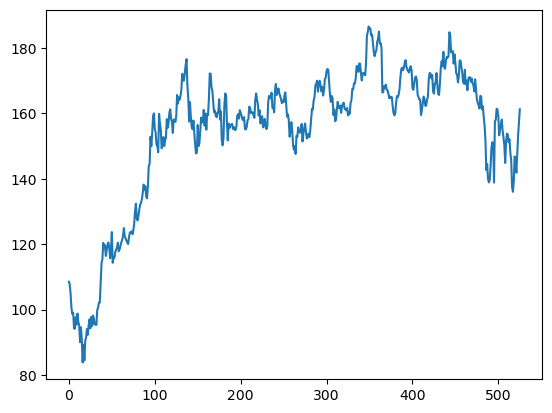

In [9]:
# plot closing
amzn_df['Close'].plot()

In [10]:
from sklearn.model_selection import train_test_split

#features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'

#split data
train_data, test_data = train_test_split(amzn_df, test_size=0.2, shuffle=False)


In [11]:
from statsmodels.tsa.arima.model import ARIMA

In [12]:
arima_model =ARIMA(train_data[target], order=(1, 1, 2))
arima_fit = arima_model.fit()

In [13]:
from sklearn.metrics import mean_squared_error

predictions = arima_fit.forecast(steps=len(test_data))
mse = mean_squared_error(test_data[target], predictions)
print(mse)

207.69028347577392


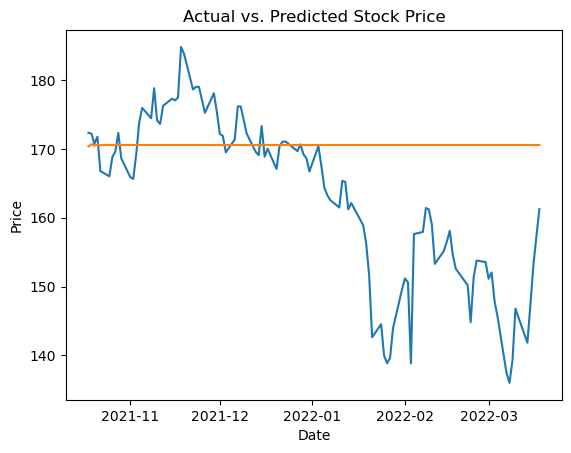

In [14]:
# plot
plt.plot(test_data['Date'], test_data[target], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Price')
plt.show()

In [15]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [16]:
import xgboost as xgb

#features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'

train_dmatrix = xgb.DMatrix(data=train_data[features], label=train_data[target])

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.1
}

# Train the XGBoost model
xgb_model = xgb.train(params=params, dtrain=train_dmatrix)

In [17]:
# Create DMatrix for test data
test_dmatrix = xgb.DMatrix(data=test_data[features], label=test_data[target])

# Use the trained XGBoost model to make predictions
xgb_predictions = xgb_model.predict(test_dmatrix)

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(test_data[target], xgb_predictions)

In [19]:
xgb_predictions

array([165.06265, 165.06265, 164.09047, 165.06265, 161.85672, 161.33879,
       162.25604, 162.71307, 165.06265, 162.25604, 161.33879, 160.68971,
       162.71307, 165.98538, 166.61824, 166.61824, 168.20413, 166.93295,
       165.98538, 166.61824, 169.1517 , 169.1517 , 169.1517 , 169.81409,
       169.81409, 169.1517 , 169.1517 , 169.1517 , 169.1517 , 169.1517 ,
       167.56581, 166.01022, 165.06265, 162.71307, 165.06265, 166.61824,
       166.61824, 165.98538, 165.06265, 162.71307, 162.25604, 165.98538,
       162.25604, 163.45056, 161.85672, 163.45056, 164.09047, 164.09047,
       162.71307, 164.09047, 162.71307, 162.25604, 161.85672, 163.45056,
       162.25604, 160.24855, 158.87918, 158.87918, 157.48108, 160.68971,
       160.68971, 157.48108, 158.35146, 156.23128, 154.49072, 151.96056,
       151.44435, 147.97424, 147.97424, 147.97424, 147.97424, 147.97424,
       149.12683, 151.44435, 151.44435, 147.97424, 155.58066, 155.58066,
       157.48108, 157.48108, 156.23128, 153.05092, 

In [22]:
temp_data = test_dmatrix.get_data()
print(test_data)

  (0, 0)	169.418
  (0, 1)	172.4585
  (0, 2)	169.255
  (0, 3)	172.337
  (0, 4)	63482000.0
  (1, 0)	171.7145
  (1, 1)	172.7345
  (1, 2)	171.1
  (1, 3)	172.2075
  (1, 4)	47722000.0
  (2, 0)	172.633
  (2, 1)	173.143
  (2, 2)	170.0185
  (2, 3)	170.753
  (2, 4)	42796000.0
  (3, 0)	170.7125
  (3, 1)	172.014
  (3, 2)	170.15
  (3, 3)	171.7505
  (3, 4)	37628000.0
  (4, 0)	171.05
  (4, 1)	171.492
  (4, 2)	166.565
  (4, 3)	166.7775
  (4, 4)	62782000.0
  :	:
  (101, 0)	145.981
  (101, 1)	147.45
  (101, 2)	140.884
  (101, 3)	141.853
  (101, 4)	74086000.0
  (102, 0)	142.85
  (102, 1)	147.985
  (102, 2)	142.0
  (102, 3)	147.3665
  (102, 4)	75584000.0
  (103, 0)	148.5
  (103, 1)	153.15
  (103, 2)	147.3535
  (103, 3)	153.104
  (103, 4)	84958000.0
  (104, 0)	152.6405
  (104, 1)	157.4985
  (104, 2)	152.14
  (104, 3)	157.239
  (104, 4)	72934000.0
  (105, 0)	156.813
  (105, 1)	161.594
  (105, 2)	156.011
  (105, 3)	161.2505
  (105, 4)	102962000.0


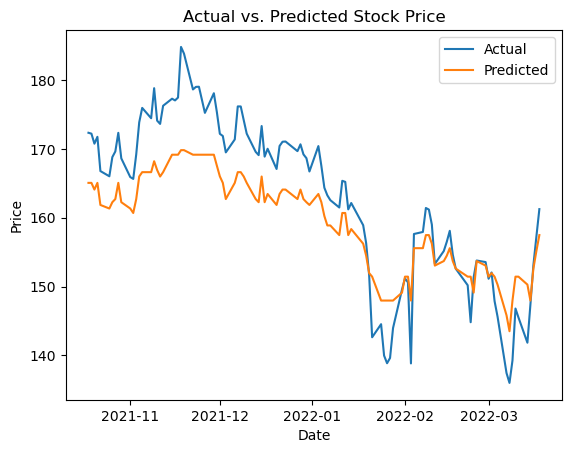

In [20]:
# plot
plt.plot(test_data['Date'], test_data[target], label='Actual')
plt.plot(test_data['Date'], xgb_predictions, label='Predicted')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Stock Price')
plt.show()
